# Korean Weather Trends


In [1033]:
% matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [1034]:
# Yellow Dust data
airdf = pd.read_excel('yellowDust 10 year.xlsx', skiprows=4)
#clean up data
del airdf['Branch Number']
del airdf['Unnamed: 4']
del airdf['Unnamed: 5']
# Set colummn, extract all to earliest complete date
airdf.columns = ['city', 'date', 'dust']
airdf = airdf.sort_values(['city','date'])
airdf = airdf[(airdf['city'] != 'Busan') & (airdf['city'] != 'Incheon')]
airdf = airdf[airdf['date'] >= '05/1/2008']
# Remove leap year days
airdf = airdf[airdf['date'] != '02/29/2008']
airdf = airdf[airdf['date'] != '02/29/2012']
airdf = airdf[airdf['date'] != '02/29/2016']
# Add day of the year
airdf['day'] = pd.DatetimeIndex(airdf['date']).dayofyear
airdf['month'] = pd.DatetimeIndex(airdf['date']).month
airdf['year'] = pd.DatetimeIndex(airdf['date']).year
# df split by city
sdf = airdf[airdf['city'] == 'Seoul']
gdf = airdf[airdf['city'] == 'Gwangju']
ddf = airdf[airdf['city'] == 'Daegu']

In [1035]:
# Seoul Precipitation data
pdf = pd.read_excel('seoul precipitation.xlsx', skiprows=6)
pdf.columns = ['date', 'Branch Number', 'rain mm']
#pdf = pdf.fillna(value=0) ## data was only included when there was rainfall
pdf = pdf[['date', 'rain mm']]
pdf = pdf[pdf['date'] != '02/29/2008']
pdf = pdf[pdf['date'] != '02/29/2012']
pdf = pdf[pdf['date'] != '02/29/2016']
# Seoul Tempurature data
tdf = pd.read_excel('seoul temperature.xlsx', skiprows=6)
tdf.columns = ['date', 'Branch Number', 'avg', 'min', 'max']
tdf = tdf[['date', 'avg', 'min', 'max']]
tdf = tdf[tdf['date'] != '02/29/2008']
tdf = tdf[tdf['date'] != '02/29/2012']
tdf = tdf[tdf['date'] != '02/29/2016']
# Seoul merged df
seoul = pd.merge(sdf, pdf, how='left', left_on='date', right_on= 'date' )
seoul = pd.merge(seoul, tdf, how='left', left_on='date', right_on= 'date' )

In [1036]:
# Gwangju Precipitation data
pdf = pd.read_excel('gwangju precipitation.xlsx', skiprows=6)
pdf.columns = ['date', 'Branch Number', 'rain mm']
#pdf = pdf.fillna(value=0) ## data was only included when there was rainfall
pdf = pdf[['date', 'rain mm']]
pdf = pdf[pdf['date'] != '02/29/2008']
pdf = pdf[pdf['date'] != '02/29/2012']
pdf = pdf[pdf['date'] != '02/29/2016']
# Gwangju Tempurature data
tdf = pd.read_excel('gwangju temperature.xlsx', skiprows=6)
tdf.columns = ['date', 'Branch Number', 'avg', 'min', 'max']
tdf = tdf[['date', 'avg', 'min', 'max']]
tdf = tdf[tdf['date'] != '02/29/2008']
tdf = tdf[tdf['date'] != '02/29/2012']
tdf = tdf[tdf['date'] != '02/29/2016']
# Gwangju merged df
gwangju = pd.merge(gdf, pdf, how='left', left_on='date', right_on= 'date' )
gwangju = pd.merge(gwangju, tdf, how='left', left_on='date', right_on= 'date' )

In [1037]:
# Daegu Precipitation data
pdf = pd.read_excel('daegu precipitation.xlsx', skiprows=6)
pdf.columns = ['date', 'Branch Number', 'rain mm']
#pdf = pdf.fillna(value=0) ## data was only included when there was rainfall
pdf = pdf[['date', 'rain mm']]
pdf = pdf[pdf['date'] != '02/29/2008']
pdf = pdf[pdf['date'] != '02/29/2012']
pdf = pdf[pdf['date'] != '02/29/2016']
# Daegu Tempurature data
tdf = pd.read_excel('daegu temperature.xlsx', skiprows=6)
tdf.columns = ['date', 'Branch Number', 'avg', 'min', 'max']
tdf = tdf[['date', 'avg', 'min', 'max']]
tdf = tdf[tdf['date'] != '02/29/2008']
tdf = tdf[tdf['date'] != '02/29/2012']
tdf = tdf[tdf['date'] != '02/29/2016']
# Daegu merged df
daegu = pd.merge(ddf, pdf, how='left', left_on='date', right_on= 'date' )
daegu = pd.merge(daegu, tdf, how='left', left_on='date', right_on= 'date' )

In [1038]:
daegu_a = daegu.groupby(['day'])[['avg']].mean()
daegu_d = daegu.groupby(['day'])[['dust']].mean()
daegu_r = daegu.groupby(['day'])[['rain mm']].mean()

<IPython.core.display.Javascript object>


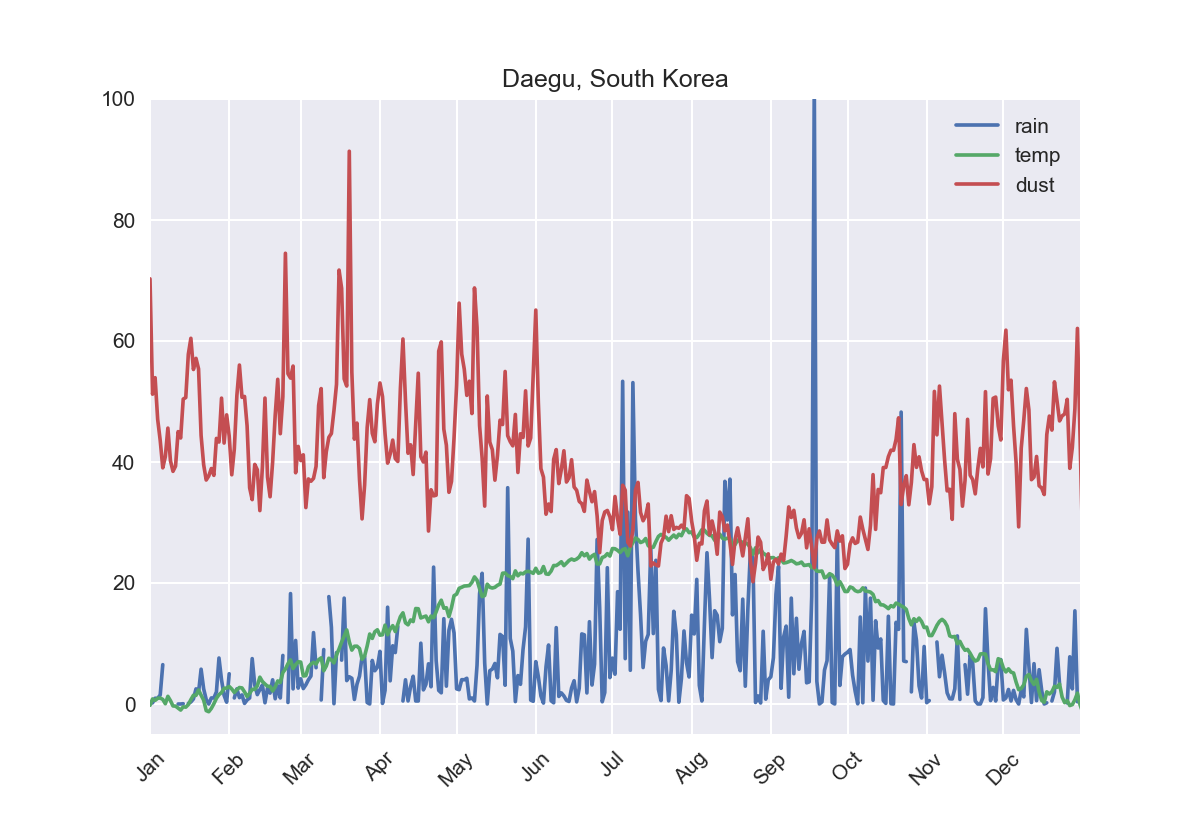

In [1039]:
plt.figure()
plt.plot(daegu_r, label = 'rain')
plt.plot(daegu_a, label = 'temp')
plt.plot(daegu_d, label = 'dust')

In [1040]:
## Cleaning Up Visual
# Fixing the dates
from matplotlib.dates import *
months = MonthLocator()
mformat = DateFormatter('%b')
ax = plt.gca()
ax.axis([1,365,-5, 100])
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(mformat)

# Removing ticks
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')

# Removing Frames
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# labeling
plt.xticks(rotation=45)
plt.title('Daegu, South Korea')
#ax.set_ylabel('Temperature ($^{\circ}$C)')
plt.legend(frameon=False)

In [1041]:
# Daegu average df
daegu_a = daegu.groupby(['day'])[['avg']].mean()
daegu_d = daegu.groupby(['day'])[['dust']].mean()
daegu_r = daegu.groupby(['day'])[['rain mm']].mean()
daegu_mi = daegu.groupby(['day'])[['min']].mean()
daegu_ma = daegu.groupby(['day'])[['max']].mean()
daegu_df = pd.merge(daegu_a, daegu_r, how='left', left_index=True, right_index=True)
daegu_df = pd.merge(daegu_df, daegu_d, how='left', left_index=True, right_index=True)
daegu_df = pd.merge(daegu_df, daegu_mi, how='left', left_index=True, right_index=True)
daegu_df = pd.merge(daegu_df, daegu_ma, how='left', left_index=True, right_index=True)
daegu_df['City'] = 'Daegu'
# Seoul average df
seoul_a = seoul.groupby(['day'])[['avg']].mean()
seoul_d = seoul.groupby(['day'])[['dust']].mean()
seoul_r = seoul.groupby(['day'])[['rain mm']].mean()
seoul_mi = seoul.groupby(['day'])[['min']].mean()
seoul_ma = seoul.groupby(['day'])[['max']].mean()
seoul_df = pd.merge(seoul_a, seoul_r, how='left', left_index=True, right_index=True)
seoul_df = pd.merge(seoul_df, seoul_d, how='left', left_index=True, right_index=True)
seoul_df = pd.merge(seoul_df, seoul_mi, how='left', left_index=True, right_index=True)
seoul_df = pd.merge(seoul_df, seoul_ma, how='left', left_index=True, right_index=True)
seoul_df['City'] = 'Seoul'
# Gwangju average df
gwangju_a = gwangju.groupby(['day'])[['avg']].mean()
gwangju_d = gwangju.groupby(['day'])[['dust']].mean()
gwangju_r = gwangju.groupby(['day'])[['rain mm']].mean()
gwangju_mi = gwangju.groupby(['day'])[['min']].mean()
gwangju_ma = gwangju.groupby(['day'])[['max']].mean()
gwangju_df = pd.merge(gwangju_a, gwangju_r, how='left', left_index=True, right_index=True)
gwangju_df = pd.merge(gwangju_df, gwangju_d, how='left', left_index=True, right_index=True)
gwangju_df = pd.merge(gwangju_df, gwangju_mi, how='left', left_index=True, right_index=True)
gwangju_df = pd.merge(gwangju_df, gwangju_ma, how='left', left_index=True, right_index=True)
gwangju_df['City'] = 'Gwangju'

In [1042]:
df = pd.concat([daegu_df, seoul_df, gwangju_df])

<IPython.core.display.Javascript object>


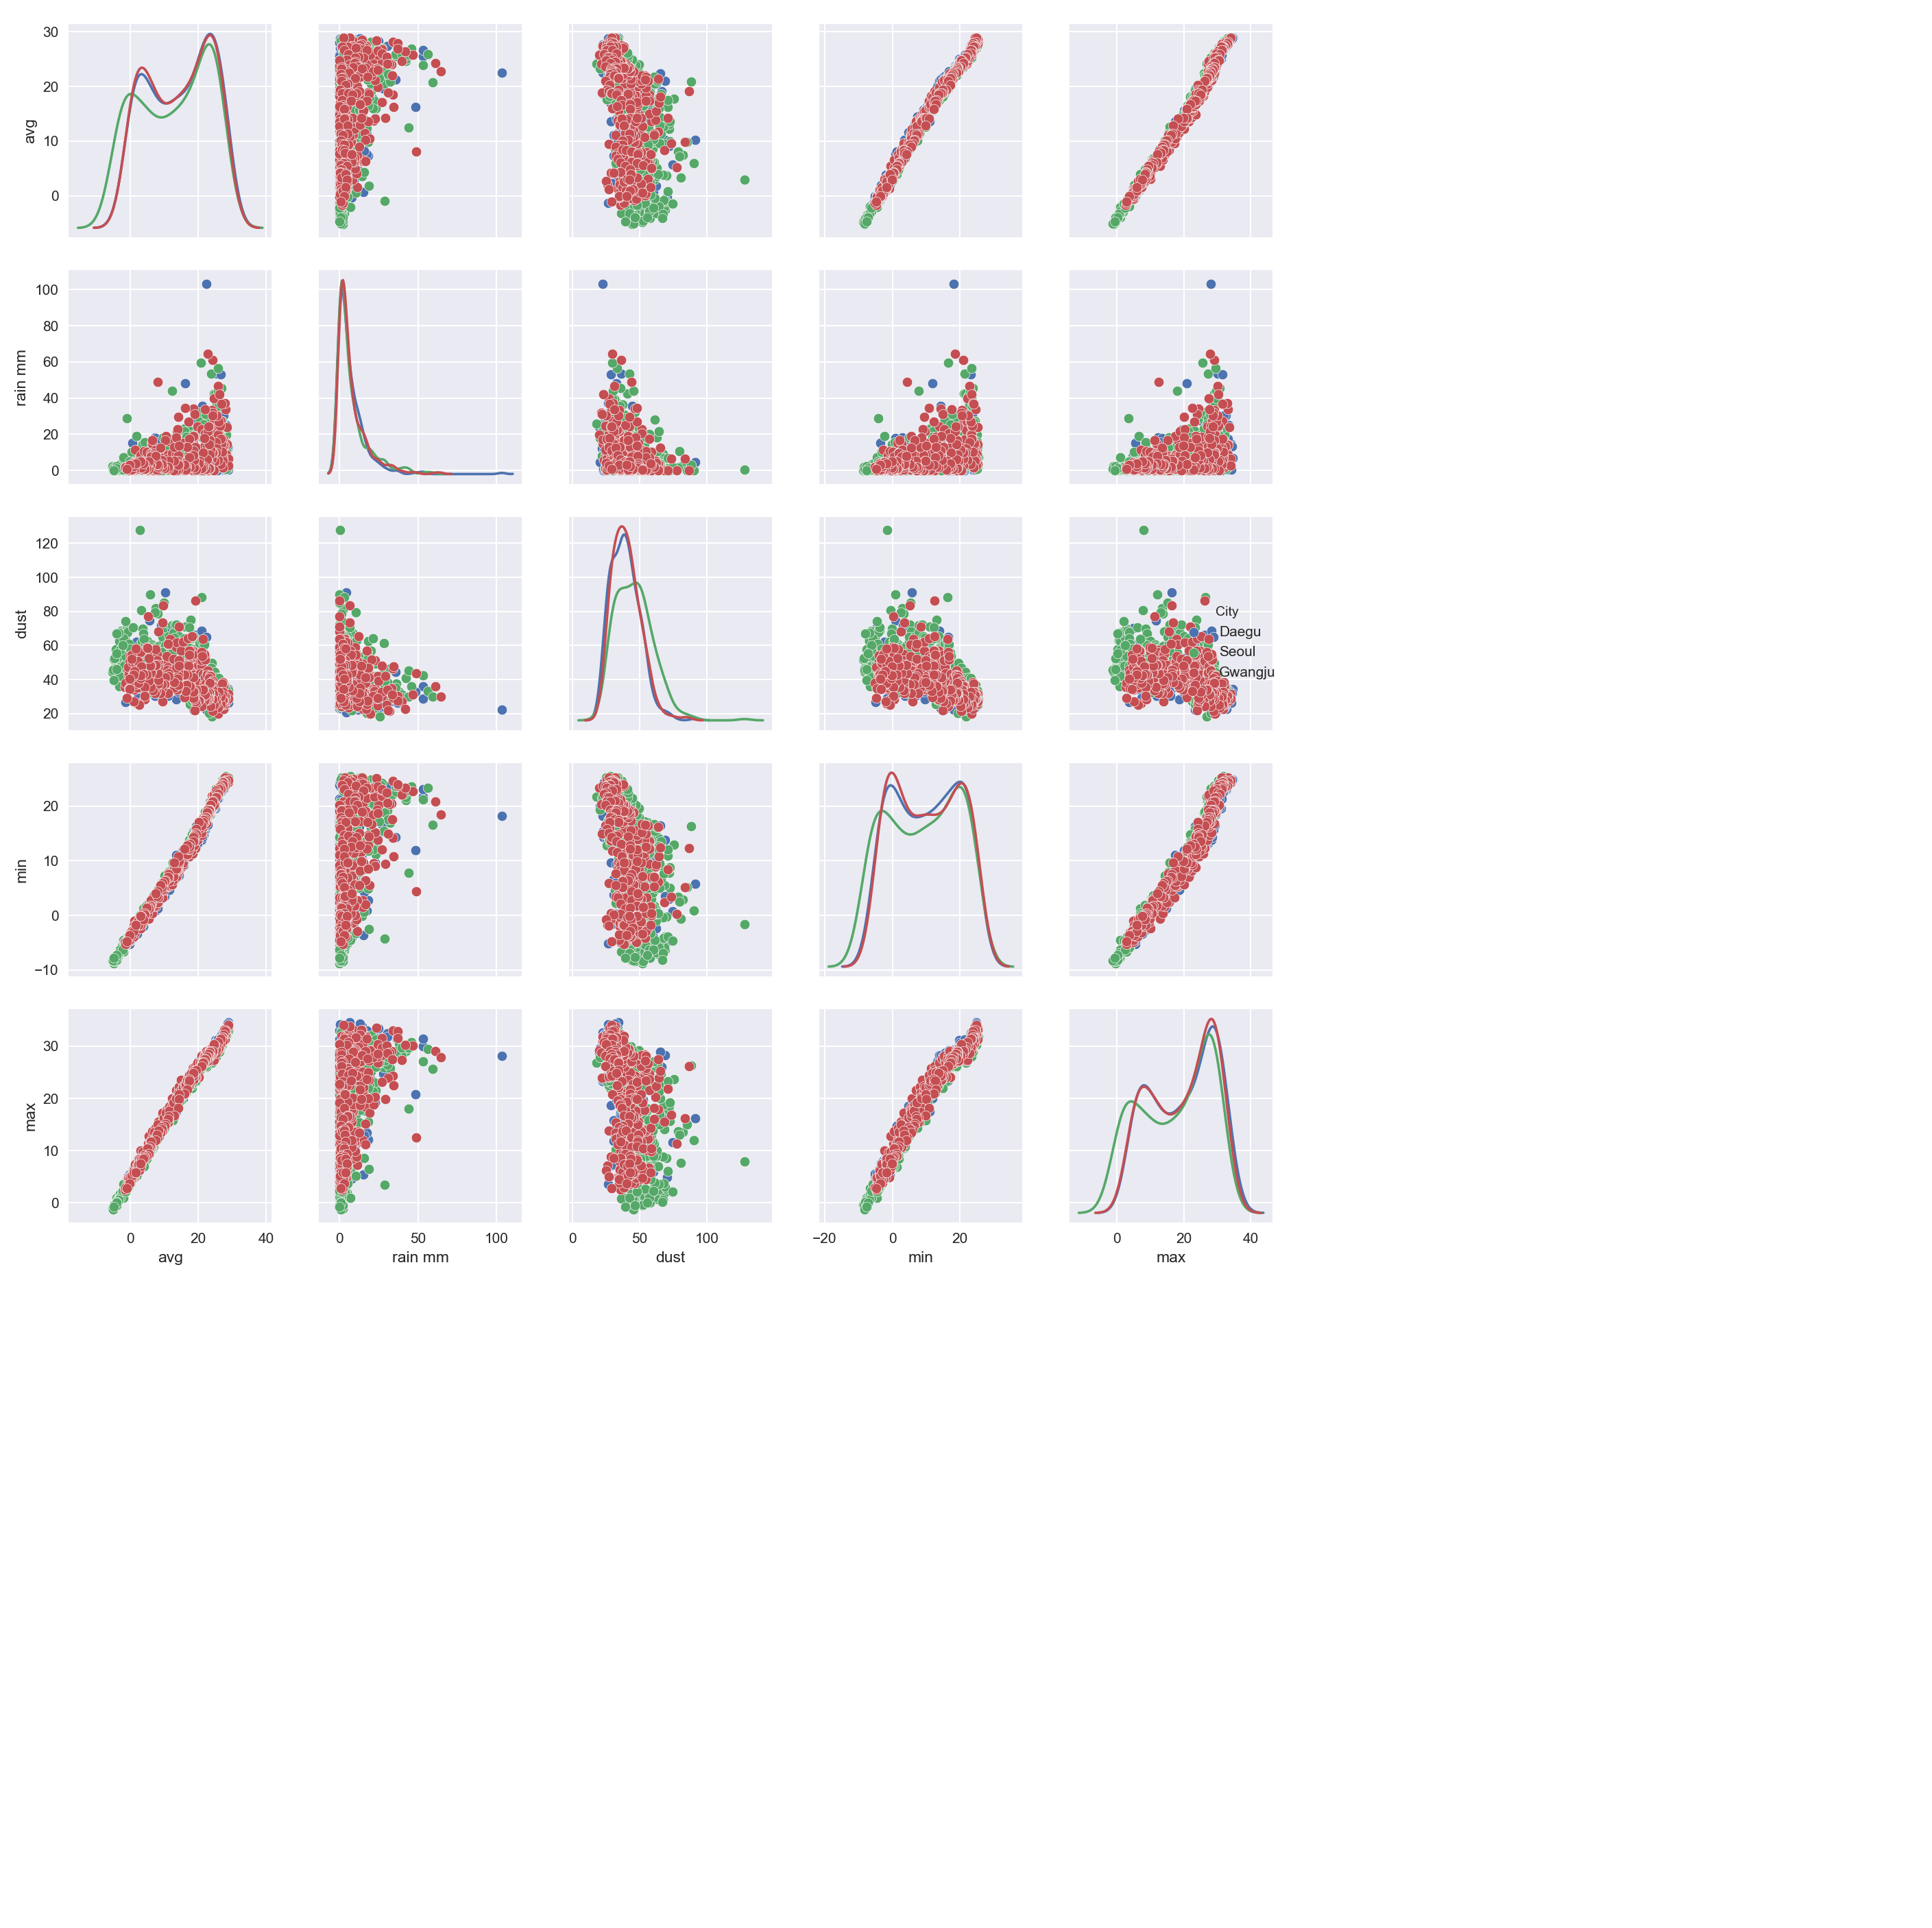

C:\Users\nadezh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\nadezh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


In [1043]:
sns.pairplot(df, hue='City', diag_kind='kde');

In [1044]:
years = len(seoul)/365
# Avg number of dust days above WHO developing health goal per year
gdust = len(gwangju[gwangju['dust'] >= 50])/years # divided by the number of years
sdust = len(seoul[seoul['dust'] >= 50])/years 
ddust = len(daegu[daegu['dust'] >= 50])/years 
dustdays = pd.Series({'Daegu':ddust,'Gwangju': gdust,'Seoul':sdust})

# Avg number of days with precipitation of rain per year
drain = len(daegu[daegu['rain mm'] > 0])/years # divided by the number of years
srain = len(seoul[seoul['rain mm'] > 0])/years 
grain = len(gwangju[gwangju['rain mm'] > 0])/years 
rainy = pd.Series({'Daegu':drain,'Seoul':srain, 'Gwangju': grain })

# Avg number of days days above 33 C per year
ghot = len(gwangju[gwangju['max'] >= 33])/years # divided by the number of years
shot = len(seoul[seoul['max'] >= 33])/years
dhot = len(daegu[daegu['max'] >= 33])/years 
heatwave = pd.Series({'Daegu':dhot,'Seoul':shot, 'Gwangju': ghot })

# Avg number of days below freezing 0 C per year
gcold = len(gwangju[gwangju['min'] < 0])/years # divided by the number of years
scold = len(seoul[seoul['min'] < 0])/years 
dcold = len(daegu[daegu['min'] < 0])/years 
freezing = pd.Series({'Daegu':dcold,'Seoul':scold, 'Gwangju': gcold })

# percipitaion monthly totals
smonth = seoul.groupby(['year','month'])[['rain mm']].sum()
sstd = smonth.groupby('month')[['rain mm']].std()
smonth = smonth.groupby('month')[['rain mm']].mean()
gmonth = gwangju.groupby(['year','month'])[['rain mm']].sum()
gstd = gmonth.groupby('month')[['rain mm']].std()
gmonth = gmonth.groupby('month')[['rain mm']].mean()
dmonth = daegu.groupby(['year','month'])[['rain mm']].sum()
dstd = dmonth.groupby('month')[['rain mm']].std()
dmonth = dmonth.groupby('month')[['rain mm']].mean()

# yellow dust monthly totals
ysmonth = seoul.groupby(['year','month'])[['dust']].sum()
ysstd = ysmonth.groupby('month')[['dust']].std()
ysmonth = ysmonth.groupby('month')[['dust']].mean()
ygmonth = gwangju.groupby(['year','month'])[['dust']].sum()
ygstd = ygmonth.groupby('month')[['dust']].std()
ygmonth = ygmonth.groupby('month')[['dust']].mean()
ydmonth = daegu.groupby(['year','month'])[['dust']].sum()
ydstd = ydmonth.groupby('month')[['dust']].std()
ydmonth = ydmonth.groupby('month')[['dust']].mean()

# avg temp monthly 
tsmonth = seoul.groupby(['year','month'])[['avg']].mean()
tsstd = tsmonth.groupby('month')[['avg']].std()
tsmonth = tsmonth.groupby('month')[['avg']].mean()
tgmonth = gwangju.groupby(['year','month'])[['avg']].mean()
tgstd = tgmonth.groupby('month')[['avg']].std()
tgmonth = tgmonth.groupby('month')[['avg']].mean()
tdmonth = daegu.groupby(['year','month'])[['avg']].mean()
tdstd = tdmonth.groupby('month')[['avg']].std()
tdmonth = tdmonth.groupby('month')[['avg']].mean()

<IPython.core.display.Javascript object>


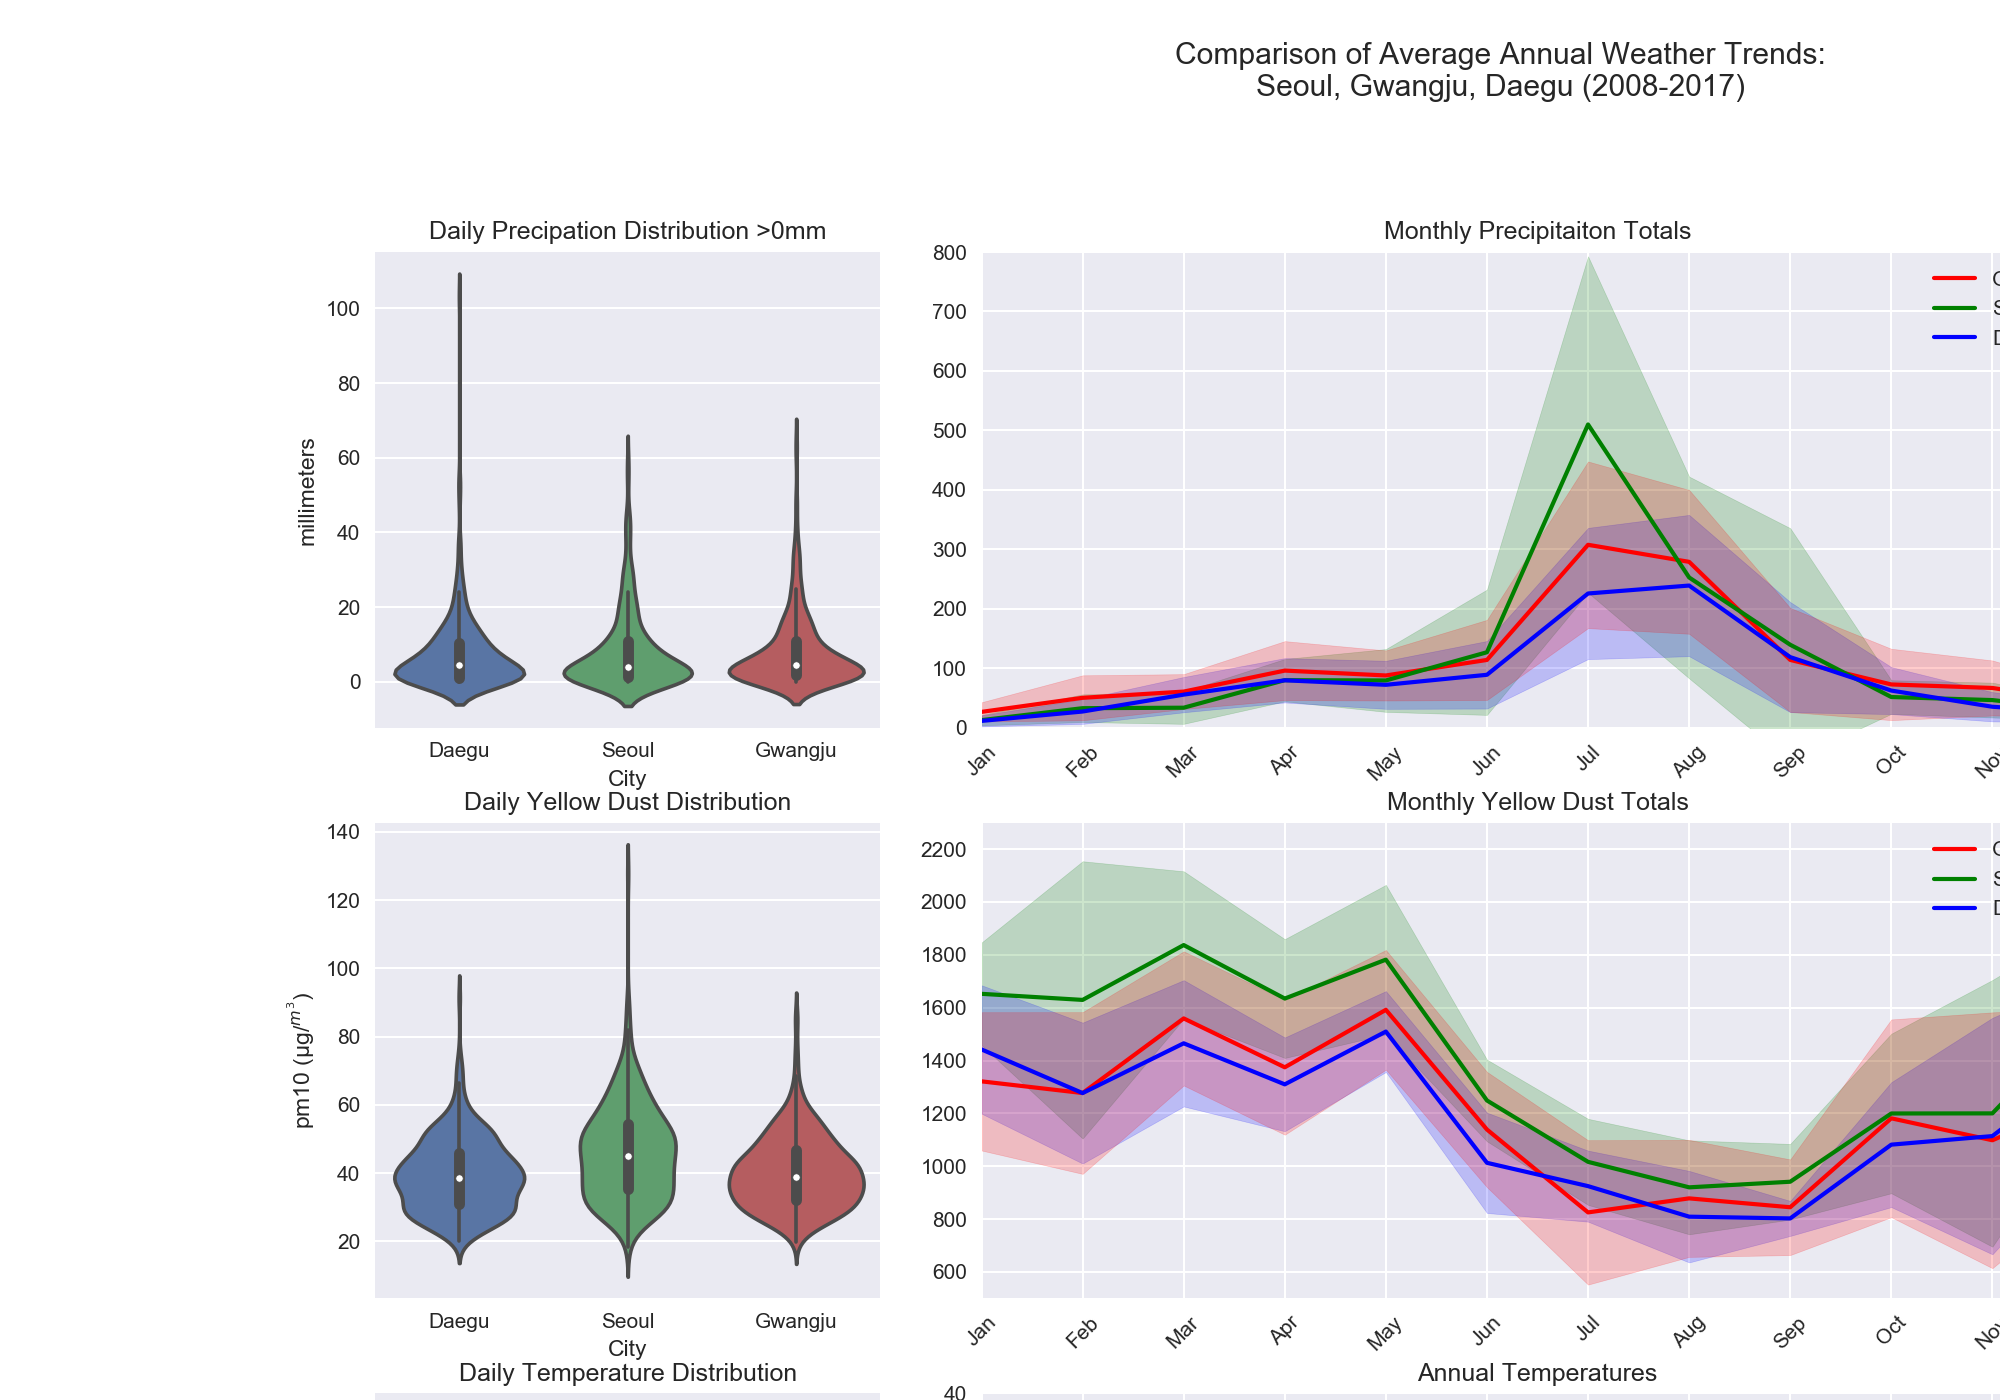

In [1045]:
import matplotlib.gridspec as gridspec
from matplotlib.dates import *
months = MonthLocator()
mformat = DateFormatter('%b')
# figure
fig = plt.figure()
# subplot grid
gridspec.GridSpec(3,4)
fig.suptitle('Comparison of Average Annual Weather Trends:\nSeoul, Gwangju, Daegu (2008-2017)')

# rainfall
plt.subplot2grid((3,4), (0,0))
sns.violinplot('City', 'rain mm', data=df);
ax = plt.gca()
ax.set_ylabel('millimeters')
ax.set_title('Daily Precipation Distribution >0mm')
# dust 
plt.subplot2grid((3,4), (1,0))
sns.violinplot('City', 'dust', data=df);
ax =plt.gca()
ax.set_ylabel('pm10 (µg/$^{m^3}$)')
ax.set_title('Daily Yellow Dust Distribution')
# avg temp
plt.subplot2grid((3,4), (2,0))
sns.violinplot('City', 'avg', data=df);
ax = plt.gca()
ax.set_ylabel('($^{\circ}$C)', rotation=0)
ax.set_title('Daily Temperature Distribution')

# rain annual line
plt.subplot2grid((3,4), (0,1), colspan=2)
plt.title('Monthly Precipitaiton Totals')
bymonths = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(smonth.shape[0]), bymonths)
plt.plot(range(smonth.shape[0]), gmonth['rain mm'], label='Gwangju', color='r', lw=2)
plt.plot(range(smonth.shape[0]), smonth['rain mm'], label='Seoul', color='g', lw=2)
plt.fill_between(range(smonth.shape[0]), smonth['rain mm'] - sstd['rain mm'], smonth['rain mm'] + sstd['rain mm'], alpha=0.2, color='g')
plt.plot(range(smonth.shape[0]), dmonth['rain mm'], label='Daegu', color='b', lw=2)
plt.fill_between(range(smonth.shape[0]), dmonth['rain mm'] - dstd['rain mm'], dmonth['rain mm'] + dstd['rain mm'], alpha=0.2, color='b')
plt.fill_between(range(smonth.shape[0]), gmonth['rain mm'] - gstd['rain mm'], gmonth['rain mm'] + gstd['rain mm'], alpha=0.2, color='r')
ax = plt.gca()
plt.xticks(rotation=45)
ax.axis([0,11, 0, 800])
plt.legend(frameon=False, loc=1)

# dust annual line
plt.subplot2grid((3,4), (1,1), colspan=2)
# plt.plot(range(gwangju_df.shape[0]), gwangju_df['dust'], c='r', label = 'Gwangju', alpha=0.7)
# plt.plot(range(seoul_df.shape[0]), seoul_df['dust'], c='g', label = 'Seoul', alpha=0.5)
# plt.plot(range(daegu_df.shape[0]), daegu_df['dust'], c='b', label = 'Daegu', alpha=0.5)
# ax = plt.gca()
# ax.axis([1,365, 0, 200])
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(mformat)
plt.plot(range(smonth.shape[0]), ygmonth['dust'], label='Gwangju', color='r', lw=2)
plt.plot(range(smonth.shape[0]), ysmonth['dust'], label='Seoul', color='g', lw=2)
plt.fill_between(range(ysmonth.shape[0]), ysmonth['dust'] - ysstd['dust'], ysmonth['dust'] + ysstd['dust'], alpha=0.2, color='g')
plt.plot(range(smonth.shape[0]), ydmonth['dust'], label='Daegu', color='b', lw=2)
plt.fill_between(range(ysmonth.shape[0]), ydmonth['dust'] - ydstd['dust'], ydmonth['dust'] + ydstd['dust'], alpha=0.2, color='b')
plt.fill_between(range(ysmonth.shape[0]), ygmonth['dust'] - ygstd['dust'], ygmonth['dust'] + ygstd['dust'], alpha=0.2, color='r' )
ax = plt.gca()
plt.xticks(range(smonth.shape[0]), bymonths)
plt.xticks(rotation=45)
plt.tick_params(labelleft='on', labelbottom='on')
plt.legend(frameon=False, loc=1)
ax.axis([0,11,500, 2300])
ax.set_title('Monthly Yellow Dust Totals')

# temp annual line
plt.subplot2grid((3,4), (2,1), colspan=2)
# plt.plot(range(gwangju_df.shape[0]), gwangju_df['avg'],c='r' , label = 'Gwangju', alpha=0.7)
# plt.plot(range(seoul_df.shape[0]), seoul_df['avg'], c='g', label = 'Seoul', alpha=0.5)
# plt.plot(range(daegu_df.shape[0]), daegu_df['avg'],c='b', label = 'Daegu', alpha=0.5)
# ax = plt.gca()
# ax.axis([1,365, -10, 40])
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(mformat)
# plt.xticks(rotation=45)
# plt.tick_params(labelleft='on', labelbottom='on')
plt.xticks(range(smonth.shape[0]), bymonths)
plt.plot(range(smonth.shape[0]), tgmonth['avg'], label='Gwangju', color='r', lw=2)
plt.plot(range(smonth.shape[0]), tsmonth['avg'], label='Seoul', color='g', lw=2)
plt.fill_between(range(smonth.shape[0]), tsmonth['avg'] - tsstd['avg'], tsmonth['avg'] + tsstd['avg'], alpha=0.2, color='g')
plt.plot(range(smonth.shape[0]), tdmonth['avg'], label='Daegu', color='b', lw=2)
plt.fill_between(range(smonth.shape[0]), tdmonth['avg'] - tdstd['avg'], tdmonth['avg'] + tdstd['avg'], alpha=0.2, color='b')
plt.fill_between(range(smonth.shape[0]), tgmonth['avg'] - tgstd['avg'], tgmonth['avg'] + tgstd['avg'], alpha=0.2, color='r')
ax = plt.gca()
plt.xticks(rotation=45)
ax.axis([0,11, -10, 40])

plt.legend(frameon=False, loc=1)
ax.set_title('Annual Temperatures')

# rainy days
plt.subplot2grid((3,4),(0,3))
ax = plt.gca()
bars = ax.bar(range(rainy.shape[0]), rainy, width=.5, color='skyblue', alpha=0.7)
plt.xticks(range(rainy.shape[0]), rainy.index)
plt.tick_params(labelleft='off')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())), 
                 ha='center', fontsize=10)
ax.set_title('Annual Rainy days')

# dust days
plt.subplot2grid((3,4),(1,3))
ax = plt.gca()
bars = ax.bar(range(dustdays.shape[0]), dustdays, width=.5, color='gold', alpha=.7)
plt.xticks(range(dustdays.shape[0]), dustdays.index)
plt.tick_params(labelleft='off')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())), 
                 ha='center', fontsize=10)
ax.set_title('Annual Yellow Dust days (over 50µg/$^{m^3}$)')

# number of days below freezing and heat days
plt.subplot2grid((3,4),(2,3))
ax = plt.gca()
bars = ax.bar(range(heatwave.shape[0]), heatwave, width=.3, color='darkorange', alpha=.7, label='> 32$^{\circ}$C')
plt.xticks(range(heatwave.shape[0]), heatwave.index)
plt.tick_params(labelleft='off')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())), 
                 ha='center', fontsize=10)
    new_vals=[]
for item in range(heatwave.shape[0]):
                  new_vals.append(item+.3)
bars2= ax.bar(new_vals, freezing, width=.3, color='dodgerblue', alpha=.7, label='< 0$^{\circ}$C')
for bar in bars2:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())), 
                 ha='center', fontsize=10)
ax.set_title('Annual Hot & Freezing days')
ax.legend(frameon=False, loc=2)

In [1046]:
#fig.tight_layout()
fig.set_size_inches(w=20,h=14)

In [1047]:
fig.savefig('Annual_trends_korea.jpg')

In [1031]:
df1 = pd.concat([daegu,gwangju,seoul])
del df1['date']
del df1['day']
del df1['month']
del df1['year']
len(df1)

10410

<IPython.core.display.Javascript object>


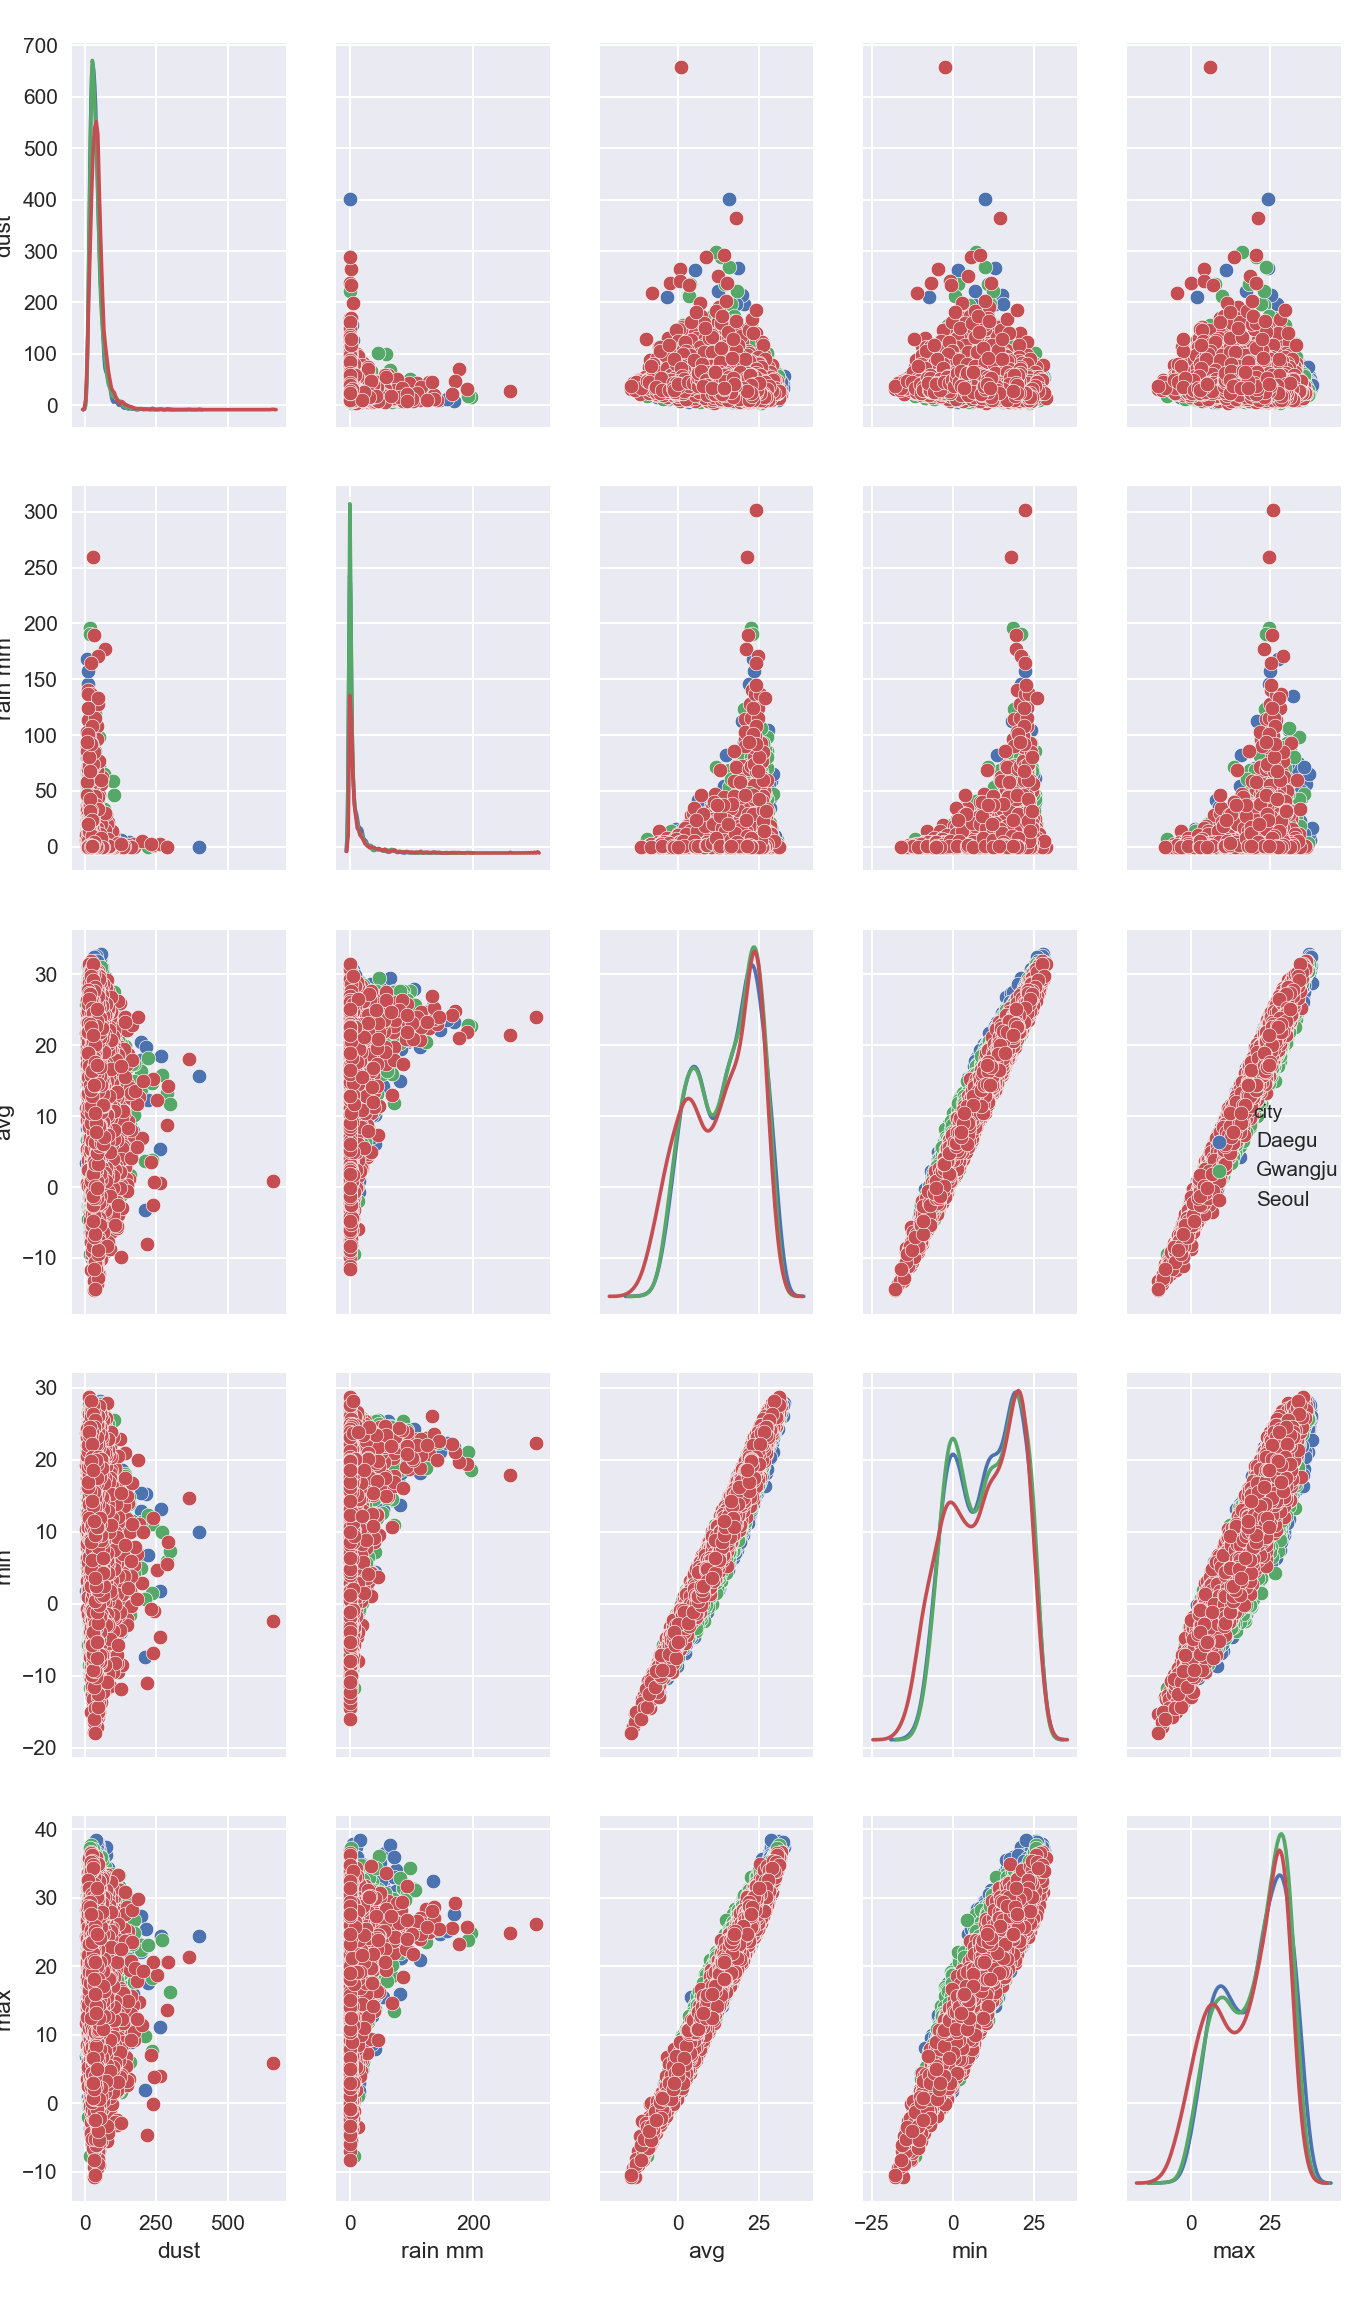

C:\Users\nadezh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\nadezh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


In [1032]:
sns.pairplot(df1, hue='city', diag_kind='kde');

<IPython.core.display.Javascript object>


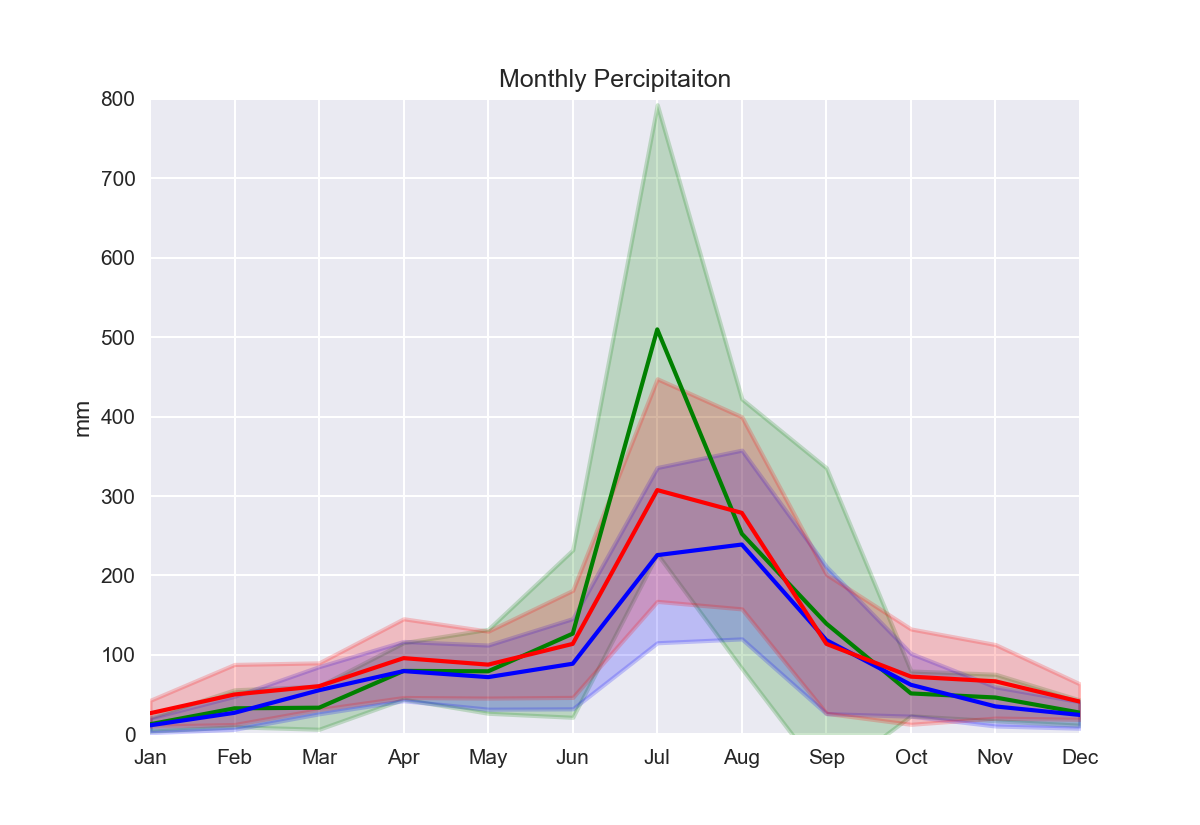

[0, 11, 0, 800]

In [999]:
plt.figure()
plt.title('Monthly Precipitaiton')
plt.ylabel('mm')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(smonth.shape[0]), months)

plt.plot(range(smonth.shape[0]), smonth['rain mm'], label='Training score', color='g', lw=2)
plt.fill_between(range(smonth.shape[0]), smonth['rain mm'] - sstd['rain mm'], smonth['rain mm'] + sstd['rain mm'], alpha=0.2, color='g', lw=2)
plt.plot(range(smonth.shape[0]), dmonth['rain mm'], label='Training score', color='b', lw=2)
plt.fill_between(range(smonth.shape[0]), dmonth['rain mm'] - dstd['rain mm'], dmonth['rain mm'] + dstd['rain mm'], alpha=0.2, color='b', lw=2)
plt.plot(range(smonth.shape[0]), gmonth['rain mm'], label='Training score', color='r', lw=2)
plt.fill_between(range(smonth.shape[0]), gmonth['rain mm'] - gstd['rain mm'], gmonth['rain mm'] + gstd['rain mm'], alpha=0.2, color='r', lw=2)
ax = plt.gca()
ax.axis([0,11, 0, 800])

<IPython.core.display.Javascript object>


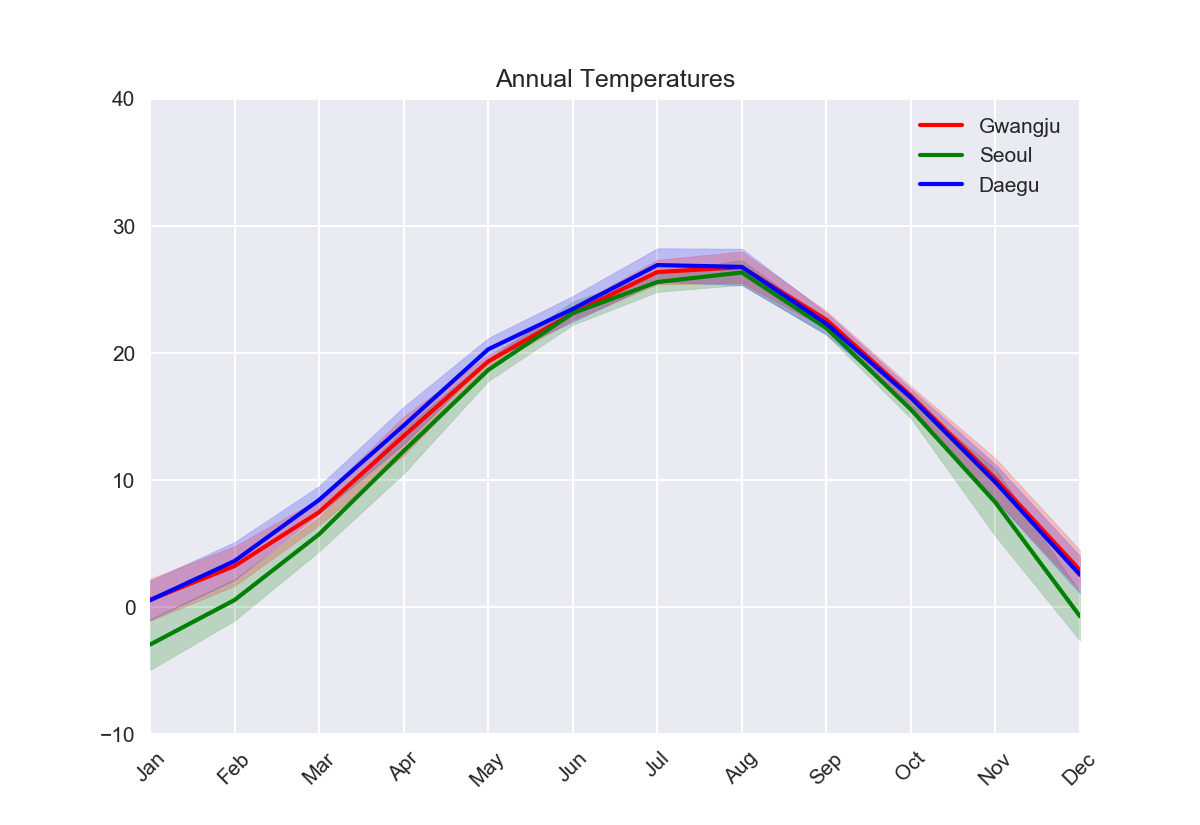

In [1006]:
plt.figure()
plt.xticks(range(smonth.shape[0]), bymonths)
plt.plot(range(smonth.shape[0]), tgmonth['avg'], label='Gwangju', color='r', lw=2)
plt.plot(range(smonth.shape[0]), tsmonth['avg'], label='Seoul', color='g', lw=2)
plt.fill_between(range(smonth.shape[0]), tsmonth['avg'] - tsstd['avg'], tsmonth['avg'] + tsstd['avg'], alpha=0.2, color='g')
plt.plot(range(smonth.shape[0]), tdmonth['avg'], label='Daegu', color='b', lw=2)
plt.fill_between(range(smonth.shape[0]), tdmonth['avg'] - tdstd['avg'], tdmonth['avg'] + tdstd['avg'], alpha=0.2, color='b')
plt.fill_between(range(smonth.shape[0]), tgmonth['avg'] - tgstd['avg'], tgmonth['avg'] + tgstd['avg'], alpha=0.2, color='r')
ax = plt.gca()
plt.xticks(rotation=45)
ax.axis([0,11, -10, 40])

plt.legend(frameon=False, loc=1)
ax.set_title('Annual Temperatures')